# Libraries

In [23]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

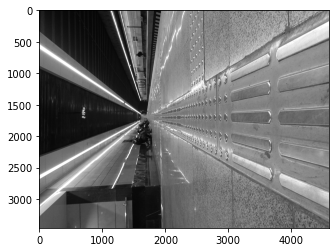

In [2]:
img = mpimg.imread("20230121_215432.jpg")
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(img, cmap= "gray")

# Sobel Kernel

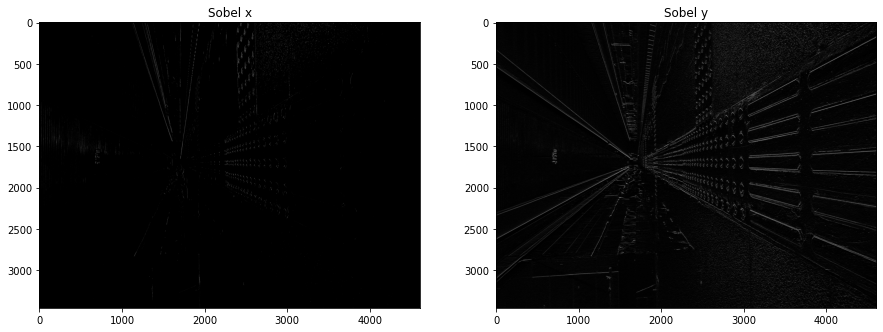

In [3]:
sobel_x = np.array( [[-1 , 0 , 1], 
                     [-2 , 0 , 1],
                     [-1 , 0 , 1]])

sobel_y = np.array( [[-1 , -2 , -1],
                     [ 0 ,  0 ,  0],
                     [ 1 ,  2 ,  1]] )
plt.subplots(1,2, figsize=(15,10))
plt.subplot(1,2,1)
plt.title("Sobel x")
xfiltered = cv2.filter2D(img, -1,sobel_x)
plt.imshow(xfiltered,cmap="gray")


plt.subplot(1,2,2)
plt.title("Sobel y")
yfiltered = cv2.filter2D(img, -1,sobel_y)
plt.imshow(yfiltered,cmap="gray")



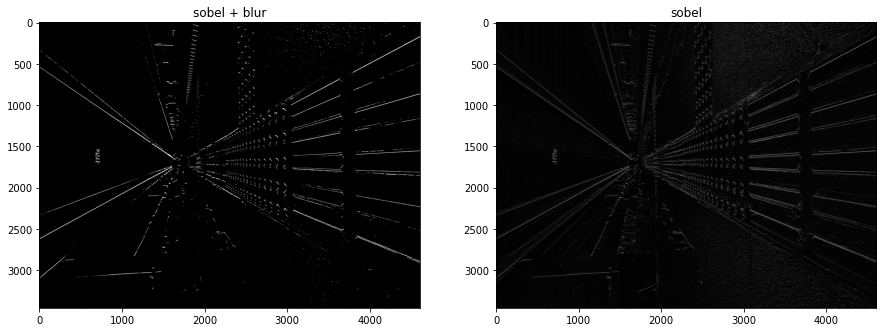

In [5]:
plt.subplots(1,2, figsize=(15,10))

## implement low pass filter before high pass
plt.subplot(1,2,1)
# add gaussian blur
blur = cv2.GaussianBlur(img, (13,13) , 0)
img_blur_edge = cv2.filter2D(blur, -1, sobel_y)
retval, img_blur_edge = cv2.threshold(img_blur_edge, 50,255, cv2.THRESH_BINARY)
plt.title("sobel + blur")
plt.imshow(img_blur_edge, cmap= "gray")

## highpass filter
plt.subplot(1,2,2)
plt.title("sobel")
plt.imshow(yfiltered, cmap= "gray")




# Fourier Transform of Filters

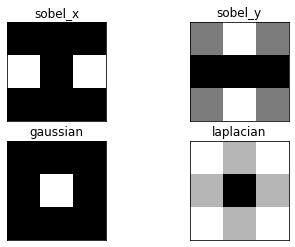

In [18]:
def fourier(img):
    img = np.fft.fft2(img)
    img = np.fft.fftshift(img)
    img = np.log(np.abs(img)+1)
    return img

sobel_x = np.array( [[-1 , 0 , 1], 
                     [-2 , 0 , 1],
                     [-1 , 0 , 1]])

sobel_y = np.array( [[-1 , -2 , -1],
                     [ 0 ,  0 ,  0],
                     [ 1 ,  2 ,  1]] )

gaussian = (1/9) * np.ones((3,3))

laplacian = np.array( [[0 , 1  , 0],
                       [1 , -4 , 1],
                       [0 , 1  , 0]])

filters = [sobel_x, sobel_y, gaussian, laplacian ]
names = ["sobel_x", "sobel_y", "gaussian", "laplacian"]

for i in range(len(filters)):
    plt.subplot(2,2,i+1)
    fourier_filter = (fourier(filters[i]))
    plt.title(names[i])
    plt.xticks([])
    plt.yticks([])
    plt.imshow(fourier_filter, cmap= "gray")



# Fourier Transform Before and After Filter

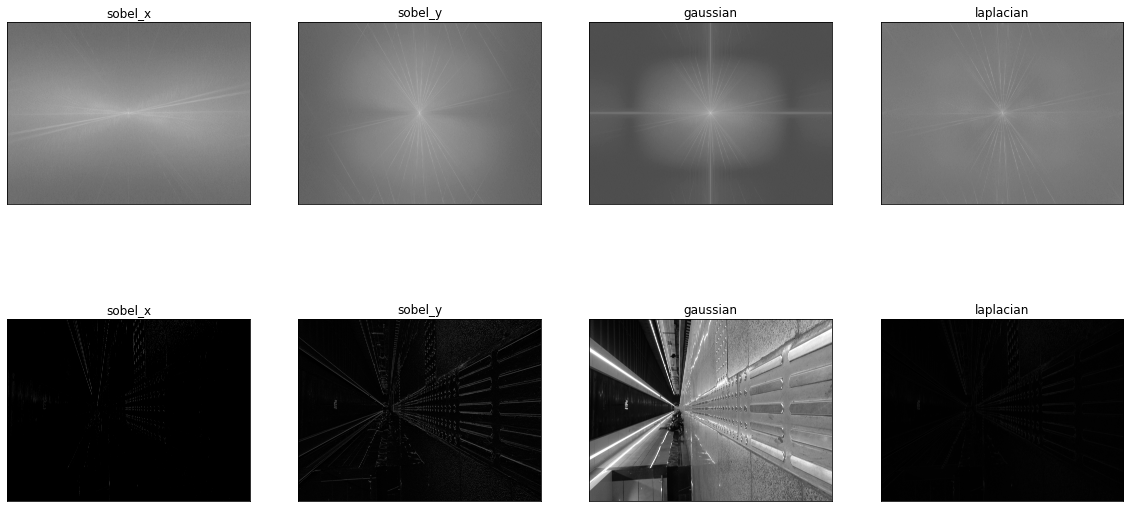

In [28]:
def image_show(image , name, i):
    plt.subplot(2,4,i)
    plt.xticks([])    
    plt.yticks([])
    plt.title(name)
    plt.imshow(image,cmap="gray")

plt.subplots(2,4,figsize = (20,10))
for i in range(len(filters)):
    image = cv2.filter2D(img, -1,filters[i])
    image_show(image,names[i],i+5)
    fourier_img_filt = fourier(image)
    image_show(fourier_img_filt,names[i],i+1)
    


# Canny Edge Detection


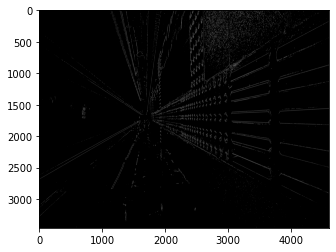

In [38]:
canny_filtered = cv2.Canny(img,220,250)
plt.imshow(canny_filtered, cmap= "gray")